In [1]:
import pickle
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

import sys
import os
# Add parent directory to system path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)
from src.plotting.importance_plots import ts_importance

In [6]:
def plot_signal(sample_idx: int = 0, save_audio: bool = False, plotting: bool = True, digit: bool = False):
    with open(f'../outputs/signals/signal_{"digit_" if digit else ""}{sample_idx}.pkl', 'rb') as f:
        signal = pickle.load(f)

    fs = 8000  # Sampling frequency in Hz
    N = 8000   # Number of samples (1-second signal)
    t = torch.arange(N) / fs


    time_signal = signal['time_signal']
    time_signal = time_signal.squeeze()
    
    # Save the time signal as a WAV file
    if save_audio:
        wavfile.write(filename=f'../outputs/signals/signal_{"digit_" if digit else ""}{sample_idx}_sound.wav', rate=fs, data=np.int16(time_signal.numpy()*32767))

    if plotting:
        frequencies = torch.fft.rfftfreq(N, 1/fs)

        freq_signal = signal['freq_signal']
        freq_signal = freq_signal.squeeze()

        importance = signal['importance']
        importance = importance.squeeze()

        # Plot the magnitude spectrum and time signal side-by-side
        fig, axs = plt.subplots(1, 2, figsize=(16, 4))

        # Time signal
        axs[0].plot(t.numpy(), time_signal.numpy())
        axs[0].set_xlabel('Time (s)')
        axs[0].set_ylabel('Magnitude')
        axs[0].set_title('Test Signal')
        axs[0].grid()

        # Magnitude spectrum
        axs[1].plot(frequencies.numpy(), freq_signal.numpy())
        axs[1].set_xlabel('Frequency (Hz)')
        axs[1].set_ylabel('Magnitude')
        axs[1].set_title('FFT of Test Signal')
        axs[1].grid()


        plt.tight_layout()
        plt.show()



        # Plot the magnitude spectrum and time signal side-by-side
        fig, axs = plt.subplots(1, 2, figsize=(16, 4))

        # Magnitude spectrum
        axs[0].plot(frequencies.numpy(), freq_signal.numpy())
        axs[0].set_xlabel('Frequency (Hz)')
        axs[0].set_ylabel('Magnitude')
        axs[0].set_title('FFT of Test Signal')
        axs[0].grid()

        # importance spectrum
        axs[1].plot(frequencies.numpy(), importance.numpy())
        axs[1].set_xlabel('Frequency (Hz)')
        axs[1].set_ylabel('importance')
        axs[1].set_title(f'Importances with target {signal['target'].item()}')
        axs[1].grid()


        plt.tight_layout()
        plt.show()

        fig, ax = plt.subplots(1,1, figsize=(16, 4))
        ts_importance(
            ax=ax, 
            importance=importance.numpy(), 
            timeseries=freq_signal.numpy()
    )

In [7]:
def plot(importances, sample_idx, digit: bool = False, identifier: str = ''):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(importances, marker='o')
    ax.set_title('Importances Plot')
    ax.set_xlabel('frequency (Hz)')
    ax.set_ylabel('Importance Value')
    ax.grid()
    plt.tight_layout()
    plt.savefig(f'outputs/figures/importances_plot_{"digit_" if digit else ""}{sample_idx}_{identifier}.png')
    plt.close()

/home/s224167/miniconda3/envs/BScProject/lib/python3.12/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/s224167/miniconda3/envs/BScProject/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


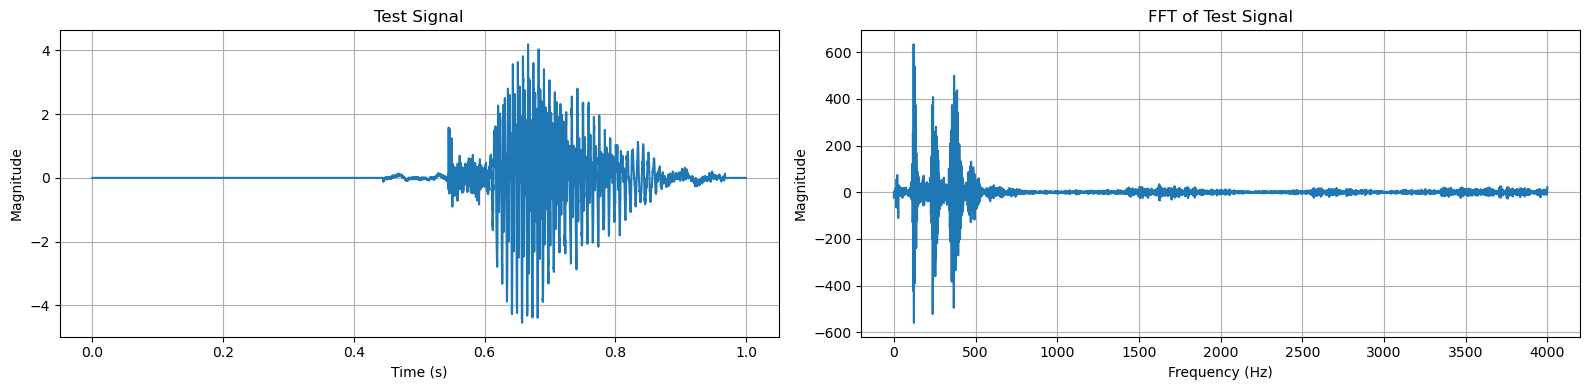

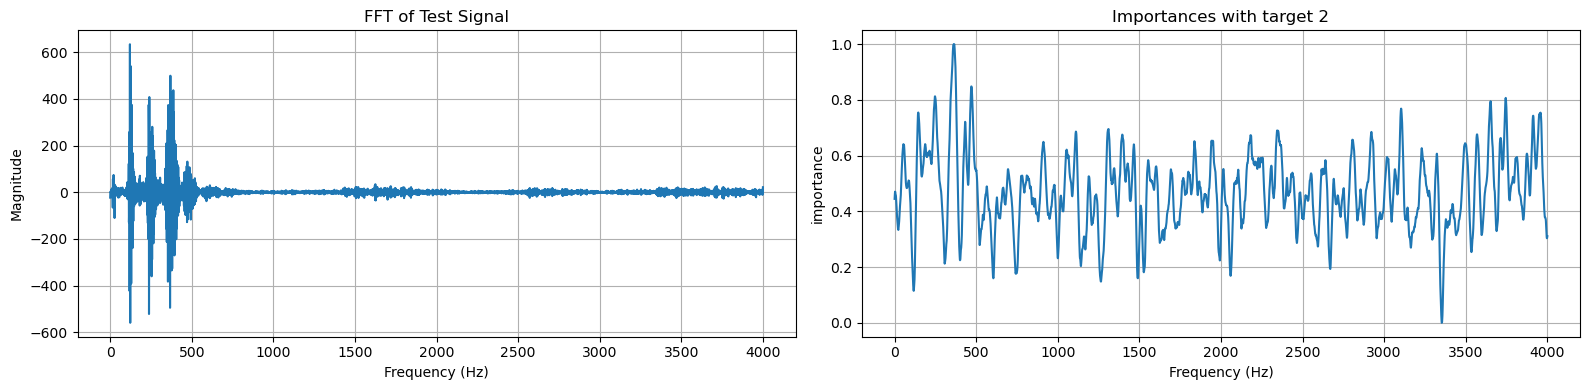

/home/s224167/miniconda3/envs/BScProject/lib/python3.12/site-packages/matplotlib/transforms.py:757: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)
/home/s224167/miniconda3/envs/BScProject/lib/python3.12/site-packages/matplotlib/transforms.py:2875: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])


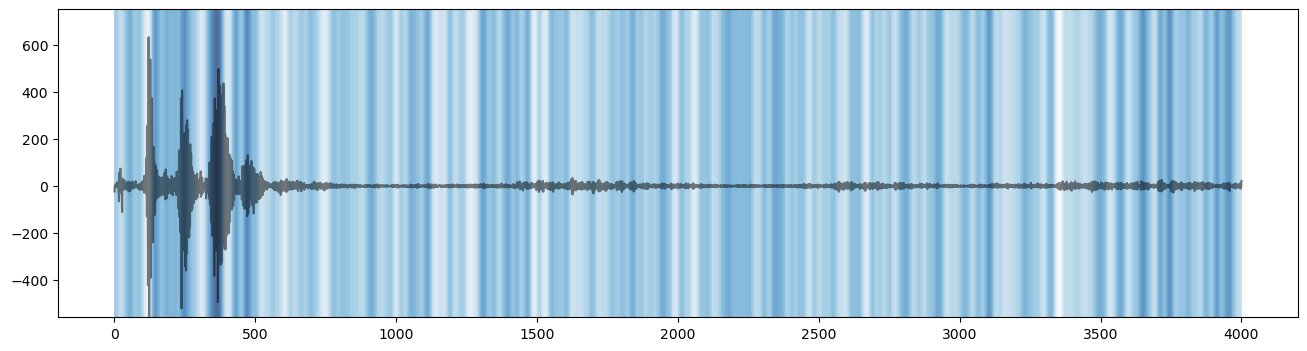

In [8]:
sample_idx = 3
plot_signal(sample_idx=sample_idx, save_audio=False, plotting=True, digit=True)